# Python 入門３

この回では、ファイル関連の操作を学習する。

まず、計算結果のファイル保存、ファイルからの読み込みの方法を学ぶ。

さらに、関数などよく用いる操作をスクリプトファイルとして保存し、それを ノートブック から呼び出す方法について学ぶ。

## ファイルの保存

以前作成したフィボナッチ数列をファイルに保存する方法を学ぶ。

Python の変数の内容は、Python を停止したり(Colab を用いる場合はそれを停止したり)、PCの電源を切ると、その内容は破棄される。
しかし、結果をテキストファイルなどで保存しておくと、その結果はPCの電源が切れても残される。

またテキストファイルにしておくことで、Pythonの環境がないPCやスマートフォンでも内容を確認することができ、
エクセルなど別のソフトウェアで読み込むことも可能となる。

### np.savetxt を用いたファイルの保存

今回は一例として、フィボナッチ数列の計算結果をリストに保存することにする。

In [2]:
a, b = 0, 1
fibonacci = [a] # 最初の要素のみが入ったリストを用意する。
while b < 1000:
    fibonacci.append(b) # リストにbの値を追加する。
    a, b = b, a+b # 現在のbの値と、現在のaとbの値から計算したa+bの値をそれぞれ aとbに代入する。
print(fibonacci)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]


計算結果をファイルに保存する方法は、 `numpy` の `savetxt` 関数を用いることである。

`savetxt` 関数の基本的な使い方は、 `savetxt([ファイル名], [保存する変数])` である。

In [3]:
import numpy as np

np.savetxt('fibonacci.txt', fibonacci)

上記を実行した後、左側のファイルアイコンをクリックし、fibonacci.txt ファイルが作成されていることを確認せよ。

作成したファイルはipynbファイルと同様に、右クリック＞ダウンロードをクリックすることで自身のPCにダウンロードできる。

### 課題1

$$
f(n)=\log(n!)
$$

となる $f(n)$ の値を、 $n∈1,...,30$ に対し計算し、`factorial.txt` という名前のファイルに保存せよ。
計算結果をPandAに添付し提出せよ。

## ファイルの読み込み

同様に、実験で得られた結果や、エクセルなど外部プログラムをPyhonで解析したいこともよくある。
その場合、テキストファイルに一度結果を保存しそれをPythonで読み込む方法が簡単である。

### np.loadtxt を用いた実験データの読み込み

あるバネに重りをかけた時のバネの全長を計測した仮想的な実験結果を想定する。
まず、以下のURLから`young.txt`ファイルをダウンロードする。
（URLを右クリック＞「名前を付けてリンクを保存」や「リンク先を別名で保存」をクリックし、ファイルを自身のPCに保存する。）

URL:
[https://raw.githubusercontent.com/Johokiso-enshu/python_textbook/master/src/young.txt](https://raw.githubusercontent.com/Johokiso-enshu/python_textbook/master/src/young.txt)

その後、ノートブックと同じフォルダに保存する。
（ipynbファイルをアップロードするときと同じように、左側のファイルリストにおいてアップロードアイコンをクリックし、young.txtを開く。）


テキストファイルの内容を確認すると、二列のデータがあることがわかる。
このようなファイルを読み込むのに最も簡単な方法は、`numpy` の `loadtxt` 関数を用いることである。

`loadtxt` 関数の基本的な使い方は、`loadtxt([ファイル名], unpack=True)` である。

In [4]:
weight, length = np.loadtxt('young.txt', unpack=True)

In [5]:
weight

array([   0.,   10.,   20.,   50.,  100.,  150.,  200.,  300.])

In [6]:
length

array([  91.3,   95.4,   96.7,  105. ,  115.9,  127.2,  139.6,  162.4])

結果をグラフに表示せよ。

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

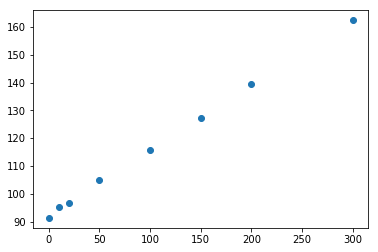

In [8]:
plt.plot(weight, length, 'o')

## コマンドラインからの実行

### Python スクリプトファイル

これまでは、Colabのノートブック を用いてプログラム開発を行ってきた。
ColabのノートブックやJupyter-notebook は試行錯誤しながらプログラムの開発する時には便利であるが、

- 繰り返し用いるプログラム
- 常時運転させるソフトウェア
- GUI 環境のないワークステーション内での計算

などでは、対話的な操作よりも、スクリプトファイルとして開発する方が望ましい。

本節では、繰り返し用いる関数をスクリプトファイル化し、
ノートブックから呼び出す方法について学ぶ。
例として、以前開発した２つのベクトルの内積を計算する `list_dot` 関数を
スクリプトファイルとして保存しよう。
注意点は:

- スクリプトファイル名は、`.py` で終わる必要がある
- スクリプトファイル内で用いるパッケージは全てスクリプトファイル内でimport する必要がある
  例えば、numpy の関数を用いるスクリプトファイルでは、ファイルの冒頭に `import numpy as np`
  を記述する必要がある。
- スクリプトファイル内からは、スクリプトファイル外の変数にはアクセスできない

ことなどである。



### スクリプトファイル内の関数を呼び出す



1. Colabノートブックの画面左に位置するファイルアイコンをクリックし、ファイルリストを表示させる。
2. ファイルリスト中で右クリック＞新しいファイルをクリックすると、untitledというファイル名のファイルが作成される。
3. untitledというファイルを右クリック＞ファイル名の変更をクリックし、`list_functions.py`というファイル名に変更する。
4. 作成したファイルをダブルクリックすると編集できる。
5. ファイル＞保存をクリックするとファイルを保存できる（Windowsならctrl+s、Macならcommand+sのショートカットキーでも保存できる）。

上で挙げた注意点に気をつけながら以下をファイル中に記述し、保存する。

----------------------------------

```Python
def list_dot(x1, x2):
  """
  2つのリストを受け取り、その内積を計算する関数。
  """
  dot = 0.0
  for i in range(len(x1)):
      dot += x1[i]*x2[i] # x += y は、x に x+y を代入することを表す。
  return dot # return 文で計算した値を返す。
```

----------------------------------

ここで作成したスクリプトファイルは、別のスクリプトファイルやノートブック中のセルなどから呼び出すことができる。

呼び出すためには、 `numpy` の関数を呼び出す時のように、`import`文を用いて呼び出しを宣言する。
（なお、ファイル拡張子 `.py` の部分は省略する必要がある）

In [9]:
import list_functions

`list_functions` の中に作成した `list_dot` 関数を呼び出すためには、  
`list_functions.list_dot`  
というように、`.`に続けて関数名を指定する。

In [10]:
# [1,1,1] と [0,1,1] の内積を計算させる。
list_functions.list_dot([1,1,1], [0,1,1])

2.0

なお、関数名にカーソルを保持することで、関数の中に書いた説明（docstring という）を表示させることができる。

<img src="figs/colab_listdot_help.png" width="60%">

**注意点**

Colabで作成したスクリプトファイルはブラウザを閉じると消去されてしまうため、必要に応じてダウンロードをして自身のPCに保存しておくこと。

### 課題2

2つの行列 A と B の積を計算する関数をスクリプトファイルとして作成せよ。
適当な2つの行列積を、そのスクリプトファイルをインポートすることで実行せよ。

なお、1つのスクリプトファイルの中には複数の関数を記述することができる。
上記関数を、`list_functions.py` の中に `list_product` という名前で作成せよ。

In [11]:
# 解答をここに記入する

## スクリプトファイルの実行

これまではノートブックを用いてスクリプトを実行してきたが、Python は単体で実行することができる。
といっても、ノートブックに記述したスクリプトを1つのファイルにまとめるだけである。

上記のlist_dot関数を用いた内積の計算を行うスクリプトファイルを作成するには、

1. list_functions.py と同じ場所に、適当な名前のファイル（例えば list_dot_script.py）を作成する。
2. 上で作った内容をファイル内に記述する。
具体的には以下のようなものである。

```python
import list_functions

print(list_functions.list_dot([1,1,1], [0,1,1]))
```

3. 以下のコマンドを入力したセルを実行することで、作成したスクリプト（list_doc_script.py）を実行できる。

```bash
!python list_dot_script.py
```

（補足）

自身のPCにPythonがインストールされていれば、コマンドプロンプト上に
```bash
python list_dot_script.py
```
と入力することでlist_doc_script.pyを実行できる。


### 課題3

2つの行列の積を計算するスクリプトファイルを`list_product_script.py` という名前で作成し、実行せよ。
また、実行結果をスクリーンショットに撮り、メール添付せよ。